In [40]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import plotly.express as px 
from scipy.stats import skew, norm 
from warnings import filterwarnings as filt 
import chart_studio.plotly as py
import plotly.graph_objs as go
from mpl_toolkits.basemap import Basemap
from pandas import Series


for dirname, _, filenames in os.walk('C:\\Users\\nik20\\Downloads'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

C:\Users\nik20\Downloads\Anaconda3-2022.05-Windows-x86_64.exe
C:\Users\nik20\Downloads\archive.zip
C:\Users\nik20\Downloads\Assignment2(upd1014).zip
C:\Users\nik20\Downloads\Assignment3(upd1106) (1).zip
C:\Users\nik20\Downloads\Assignment3(upd1106).zip
C:\Users\nik20\Downloads\Bonus_Exercises_1106.ipynb
C:\Users\nik20\Downloads\ChromeSetup.exe
C:\Users\nik20\Downloads\CNN_Keras_Exercise_Advanced_1104.ipynb
C:\Users\nik20\Downloads\CNN_Keras_Exercise_Beginner_Intermediate_1104_NT.ipynb
C:\Users\nik20\Downloads\Contractor Technical Questionnaire.docx
C:\Users\nik20\Downloads\Cover Letter General.docx
C:\Users\nik20\Downloads\data.zip
C:\Users\nik20\Downloads\desktop.ini
C:\Users\nik20\Downloads\DL_2021_lecture15.pdf
C:\Users\nik20\Downloads\DL_HW4_Load data and save results_stu (1).ipynb
C:\Users\nik20\Downloads\DL_HW4_Load data and save results_stu.ipynb
C:\Users\nik20\Downloads\EnsembleMethods-exercise-10142022.ipynb
C:\Users\nik20\Downloads\financial_report.csv
C:\Users\nik20\Download

In [25]:
meteor = pd.read_csv('C:/Users/nik20/Downloads/Meteorite_Landings.csv')
meteor = meteor[meteor.year != 2501]
meteor = meteor[meteor.year != 2101]

meteor.head()
meteor.isnull().sum()
meteor.dropna()
meteor.describe()

,id,mass (g),year,reclat,reclong
count,45715.000000,4.558400e+04,45424.000000,38400.000000,38400.000000
mean,26889.073171,1.327837e+04,1991.826413,-39.123599,61.075909
std,16860.273421,5.749952e+05,25.047805,46.378686,80.647746
min,1.000000,0.000000e+00,860.000000,-87.366670,-165.433330
25%,12688.500000,7.200000e+00,1987.000000,-76.714247,0.000000
50%,24261.000000,3.260000e+01,1998.000000,-71.500000,35.666670
75%,40655.500000,2.026225e+02,2003.000000,0.000000,157.166670
max,57458.000000,6.000000e+07,2013.000000,81.166670,354.473330


Text(0.5, 1.0, 'Geographic Distribution of meteorites')

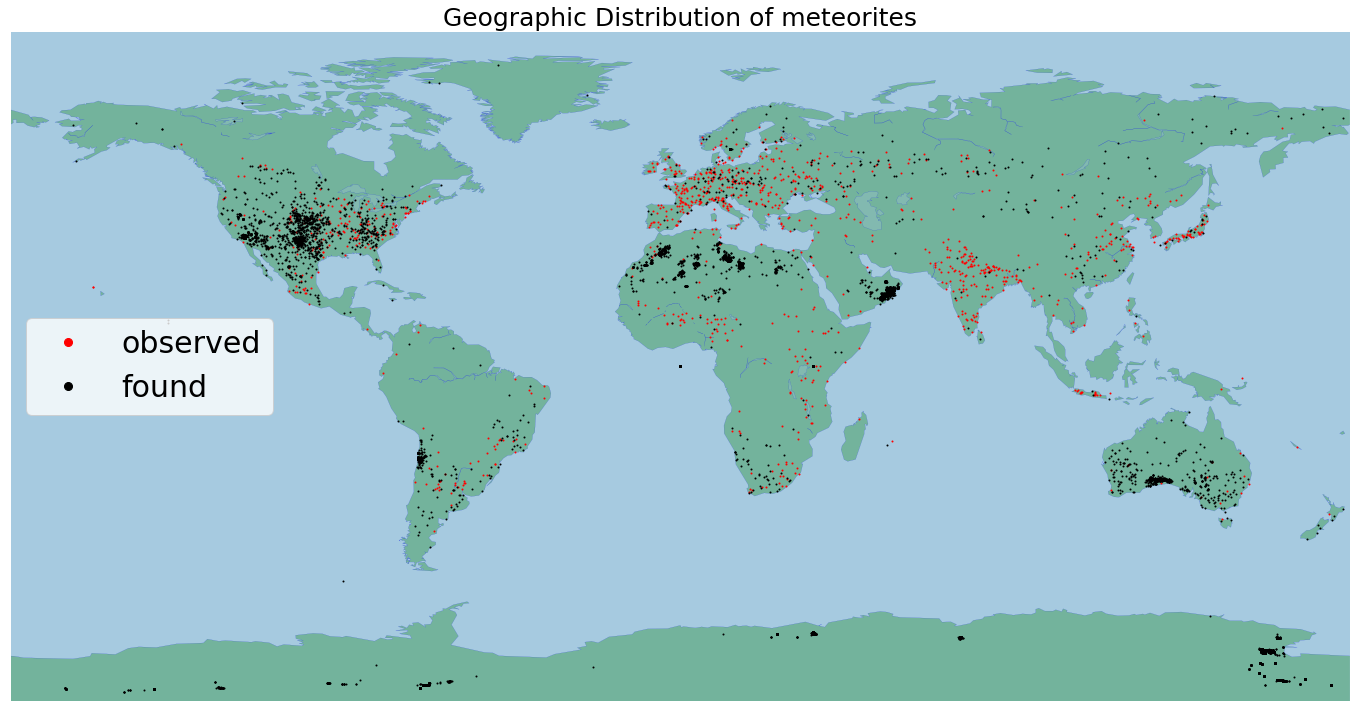

In [57]:

lat = meteor['reclat'].values
lon = meteor['reclong'].values
fell = meteor.where(meteor['fall']=='Fell')
found = meteor.where(meteor['fall']=='Found')

plt.figure(figsize=(24,18))
m=Basemap(llcrnrlon=-180, llcrnrlat=-90,urcrnrlon=180,urcrnrlat=90)
m.drawmapboundary(fill_color='#A6CAE0', linewidth=0)
m.fillcontinents(color='green', alpha=0.3)
m.drawcoastlines(linewidth=0.1, color="blue")

m.plot(fell['reclong'], fell['reclat'], linestyle='none', marker='o', ms=1, color='red', label='observed')
m.plot(found['reclong'], found['reclat'], linestyle='none', marker='o', ms=1, color='black', label='found')
plt.legend(loc=6, prop={'size': 30}, markerscale=8)
plt.title('Geographic Distribution of meteorites', fontsize=25)

Text(0.5, 1.0, 'Number of meteors per year (>2000)')

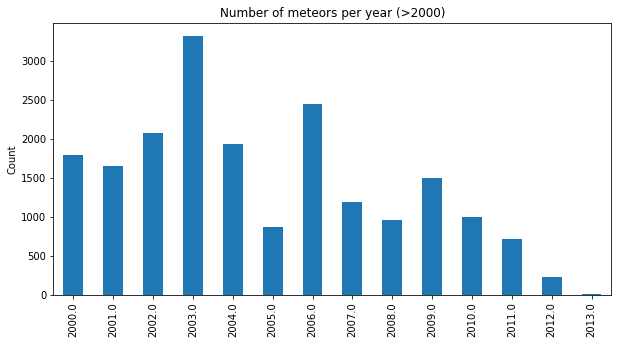

In [30]:

def fig_p(data):
    series=Series(data).value_counts().sort_index()
    series.plot(kind='bar')
    
year = sorted(i for i in meteor['year'] if i >= 2000)

plt.figure(figsize=(10,5))
fig_p(year)
plt.ylabel("Count")
plt.title("Number of meteors per year (>2000)")

<AxesSubplot: title={'center': 'Percentage of observed and found meteorites'}, ylabel='fall'>

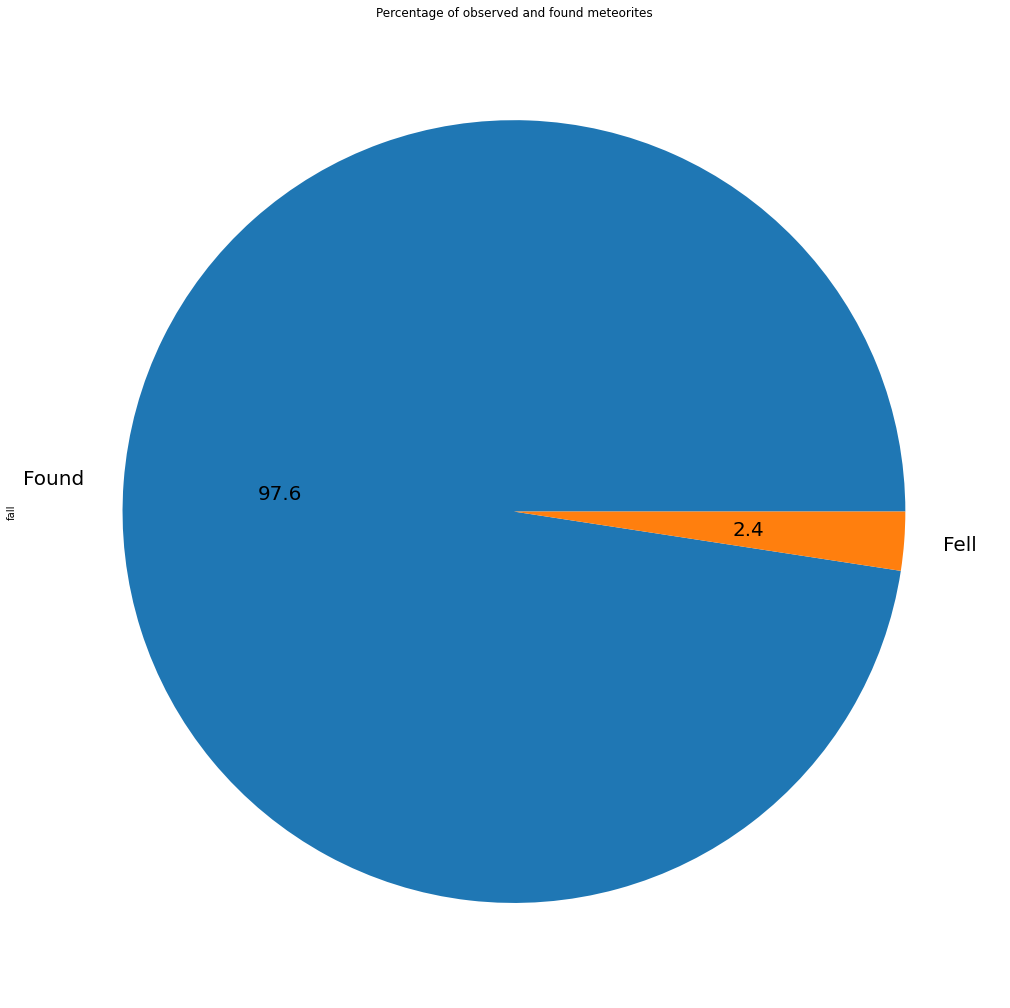

In [55]:
types = meteor['fall'].value_counts()
plt.figure(figsize=(24,18))
types.plot.pie(autopct='%.1f', fontsize=20, title='Percentage of observed and found meteorites')



<AxesSubplot: ylabel='recclass'>

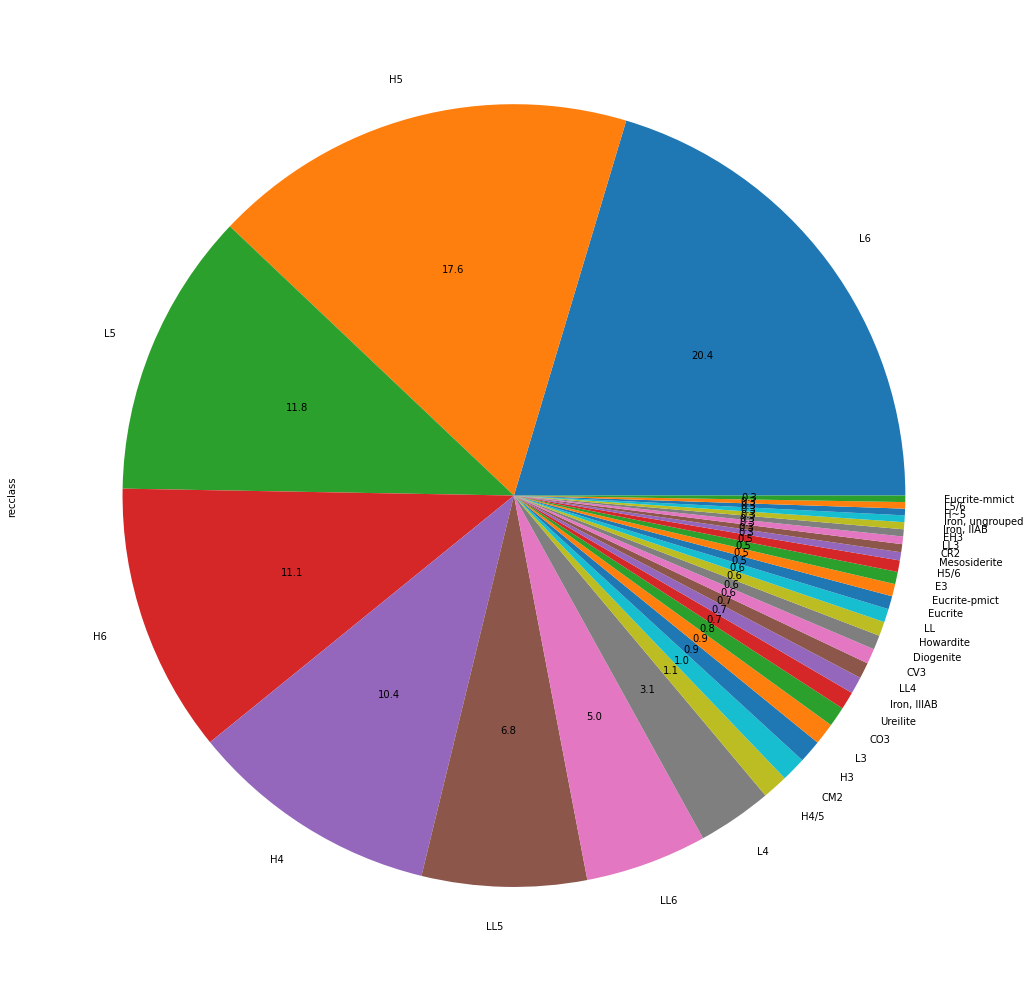

In [64]:
classes = meteor['recclass'].value_counts()
plt.figure(figsize=(24,18))
classes[classes>100].plot.pie(autopct='%0.1f')